In [3]:
import os
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
#plt.switch_backend('agg')

from scipy.integrate import odeint

#from neural_ode import NeuralODE

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
# alpha0 cose

In [4]:
def SIRD(z, t, S0, beta0, omega, gamma, mu):

    I, R, D = z
    
    S = S0 - I - R - D
    beta = beta0 * np.exp(-omega * t)
    dS = - beta * I * S / S0
    dI = beta * I * S / S0 - gamma * I - mu * I
    dR = gamma * I 
    dD = mu * I

    dzdt = [dI, dR, dD]
    return dzdt

def SIRD_weird(z, t, beta0, alpha0, alpha1, alpha2, alpha3, gamma, mu):

    I, R, D = z
    
    S0 = (alpha0 + alpha1) * beta0 
    S = S0 - I - R - D
    beta = beta0* np.exp(-(alpha2+alpha3*beta0) * t)
    #mu = mu0 * (1/ (t+1) +  3.77721160e-02)  #7.52593380e-05 : t = 50, #3.77721160e-02, t = 70, 
    dS = - beta * I * S / S0
    dI = beta * I * S / S0 - gamma * I - mu * I
    dR = gamma * I 
    dD = mu * I

    dzdt = [dI, dR, dD]
    return dzdt

def SIR(z, t, S0, beta0, omega, gamma):

    I, R = z
    S = S0 - I - R 
    beta = beta0 * np.exp(-omega * t)
    dS = - beta * I * S / N 
    dI = beta * I * S / N - gamma * I
    dR = gamma * I 

    dzdt = [dI, dR]
    return dzdt


def plot_traj_SIRD(trajectories, width = 1.):
    x2 = trajectories[:,0]
    x3 = trajectories[:,1]
    x4 = trajectories[:,2]

    i = plt.plot(x2, linewidth = width, label = 'Infected')
    r = plt.plot(x3, linewidth = width, label = 'Recovered')
    d = plt.plot(x4, linewidth = width, label = 'Deceased')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    #plt.title('Real SIRD')
    plt.title('nCov-19 data, Italy')
    plt.tight_layout()
    plt.savefig('sir.png', dpi=500)
    
    
def plot_traj_gray_SIRD(trajectories, width = 1.):
    x2 = trajectories[:,0]
    x3 = trajectories[:,1]
    x4 = trajectories[:,2]
    i = plt.plot(x2, linewidth = width, color = 'lightgray')
    r = plt.plot(x3, linewidth = width, color = 'lightgray')
    d = plt.plot(x4, linewidth = width, color = 'lightgray')
    
    
def plot_traj_SIRD_united(trajectories, width = 1.):
    x2 = trajectories[:,0]
    x3 = trajectories[:,1] + trajectories[:,2]
    i = plt.plot(x2, linewidth = width, label = 'Infected')
    r = plt.plot(x3, linewidth = width, label = 'Removed')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Real SIRD')
    
    
def plot_traj_gray_SIRD_united(trajectories, width = 1.):
    x2 = trajectories[:,0]
    x3 = trajectories[:,1] + trajectories[:,2]
    i = plt.plot(x2, linewidth = width, color = 'lightgray')
    r = plt.plot(x3, linewidth = width, color = 'lightgray')
    
def plot_traj_SIR(trajectories, width = 1.):
    x2 = trajectories[:,0]
    x3 = trajectories[:,1]
    i = plt.plot(x2, linewidth = width, label = 'Infected')
    r = plt.plot(x3, linewidth = width, label = 'Removed')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Real SIRD')

    
    
def plot_traj_gray_SIR(trajectories, width = 1.):
    x2 = trajectories[:,0]
    x3 = trajectories[:,1]
    i = plt.plot(x2, linewidth = width, color = 'lightgray')
    r = plt.plot(x3, linewidth = width, color = 'lightgray')

In [5]:
italy = pd.read_csv('Data/Sird_china.csv')

In [6]:
italy.fillna(0, inplace = True)

In [7]:
ext = 54
eff = 54
SIRD_flag = True
italy = italy[:ext]
italy.reset_index(inplace = True, drop = True)

In [8]:
data_size = italy.shape[0]

batch_time = 20 # tempo delle batches
niters = 500
batch_size = data_size - batch_time - 1

if SIRD_flag:
    extended_y = []
    for i in range(ext):
        extended_y.append([italy.loc[i,'Infected'],italy.loc[i,'Recovered'],italy.loc[i,'Dead']])
    extended_y = np.array(extended_y)
else:
    extended_y = []
    for i in range(ext):
        extended_y.append([italy.loc[i,'Infected'],italy.loc[i,'Recovered']+italy.loc[i,'Dead']])
    extended_y = np.array(extended_y)

nonorm_y = extended_y.copy()

In [9]:
italy = italy[:eff]
italy.reset_index(inplace = True, drop = True)
#italy

In [10]:
data_size = italy.shape[0]

batch_time = 15  # tempo delle batches
niters = 500
batch_size = data_size - batch_time - 1

if SIRD_flag:
    true_y = []
    for i in range(data_size):
        true_y.append([italy.loc[i,'Infected'],italy.loc[i,'Recovered'],italy.loc[i,'Dead']])
    true_y = np.array(true_y)
else:
    true_y = []
    for i in range(data_size):
        true_y.append([italy.loc[i,'Infected'],italy.loc[i,'Recovered']+italy.loc[i,'Dead']])
    true_y = np.array(true_y)

nonorm_y = true_y.copy()

In [11]:
italy['Date'] = pd.to_datetime(italy['Date'])

t_grid = np.arange(data_size)

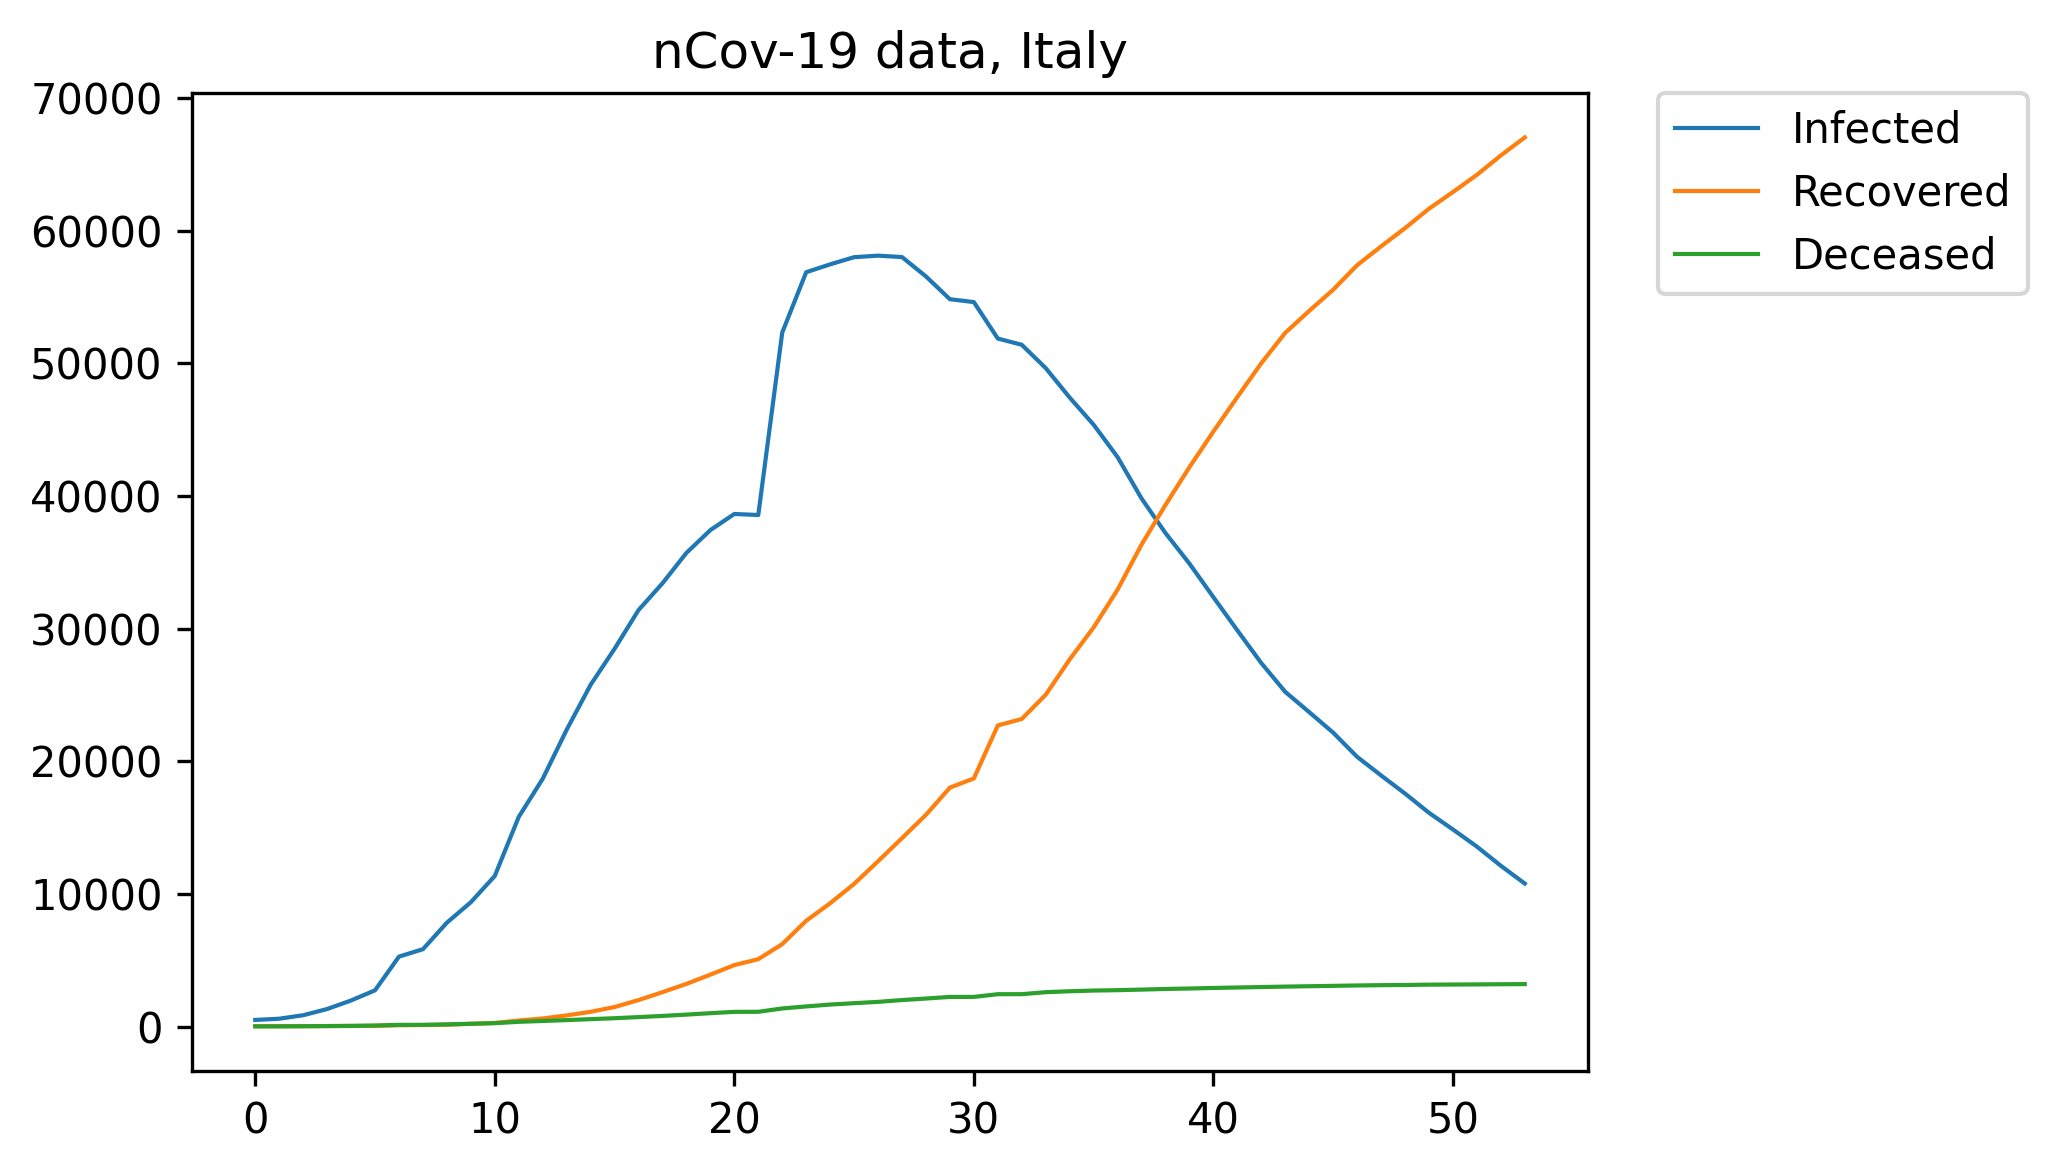

In [12]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 4), dpi=150, facecolor='w', edgecolor='k')

if SIRD_flag:
    plot_traj_SIRD(true_y)
else:
    plot_traj_SIR(true_y)

In [13]:
from scipy import integrate, optimize

if SIRD_flag:
    true_yy = np.append(true_y[:,0],true_y[:,1])
    true_yy = np.append(true_yy,true_y[:,2])

    def fit_odeint_weird(x, beta0, alpha0, alpha1, alpha2, alpha3, gamma, mu):
        fit = integrate.odeint(SIRD_weird, (503,17,28), x, args=(beta0, alpha0, alpha1, alpha2, alpha3, gamma, mu))
        fit_p = np.append(fit[:,0],fit[:,1])
        return np.append(fit_p,fit[:,2])
    
    #S0, alpha1, alpha2, alpha3, alpha4, gamma, mu
    popt, pcov = optimize.curve_fit(fit_odeint_weird, xdata = t_grid, ydata =  true_yy, p0 = (0.1, 10000, 10000, 0.1, 0.1, 0, 0.1), bounds=(0, [1, np.inf, np.inf, 1, 1, 1, 1]))


else:
    true_yy = np.append(true_y[:,0],true_y[:,1])

    def fit_odeint(x, S0, beta0, omega, gamma):
        fit = integrate.odeint(SIR, (221,8), x, args=(S0,beta0, omega, gamma))
        return np.append(fit[:,0],fit[:,1])

    popt, pcov = optimize.curve_fit(fit_odeint, xdata = t_grid, ydata =  true_yy, p0 = (2000000, 0.5, 0.1, 0.1), bounds=(0, [61000000, 5, 1, 1]))
    
popt

array([3.96621566e-01, 1.25227975e+05, 8.69876908e+04, 1.30115302e-02,
       1.52318220e-02, 3.69363232e-02, 2.33723117e-03])

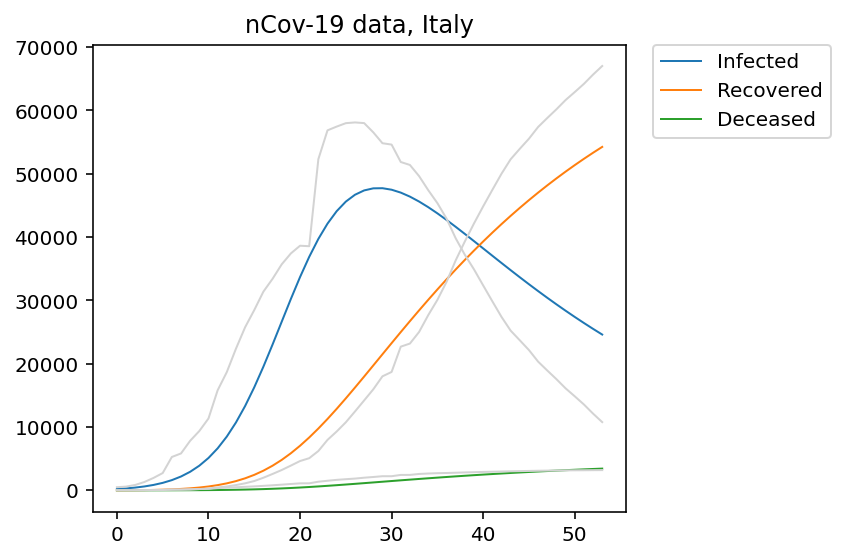

In [14]:
if SIRD_flag:
    simul_yy =  odeint(SIRD_weird, (221,1,7), np.arange(ext), args=tuple(np.reshape(popt,(1,-1))[0]))
    plot_traj_SIRD(simul_yy)
    plot_traj_gray_SIRD(extended_y)
else:
    simul_yy =  odeint(SIR, (221,8), np.arange(ext), args=tuple(np.reshape(popt,(1,-1))[0]))
    plot_traj_SIR(simul_yy)
    plot_traj_gray_SIR(extended_y)

In [15]:
extended_yy = np.append(extended_y[:,0],extended_y[:,1])
extended_yy = np.append(extended_yy,extended_y[:,2])

In [16]:
residuals = np.ravel(extended_yy) - fit_odeint_weird(np.arange(ext), *popt)
ss_res = np.sum(residuals**2)

ss_tot = np.sum((np.ravel(extended_yy)-np.ravel(np.mean(extended_yy)))**2)

r_squared = 1 - (ss_res / ss_tot)

r_squared 

0.9442619075621591